Libraries import 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.linalg import inv
from scipy.stats import chi2

In [2]:
n = 10
sigma = np.sqrt(0.5)

Preparation of the data

In [3]:
ones = np.ones(n)
x = np.random.uniform(0, 1, n)
x = np.sort(x)
x_square = np.square(x)
x_cubic = np.power(x, 3)

X = np.column_stack((ones, x, x_square, x_cubic))
X_T = X.transpose()

epsilon = np.random.normal(0, sigma, n)

beta = np.array([1, 1, 2, 3])
y_theory = X @ beta
y_realized = y_theory + epsilon

beta_hat = inv(X_T @ X) @ X_T @ y_realized
y_estimated = X @ beta_hat

Method 1

In [4]:
var_beta_hat = inv(X_T @ X) * (sigma**2)
tmp = X @ var_beta_hat
tmp = tmp @ X_T
width = np.diag(tmp)
width = np.sqrt(width)
width_upper = y_estimated + 1.96 * width
width_lower = y_estimated - 1.96 * width

Method 2

In [5]:
U_T = np.linalg.cholesky(X_T @ X)
U = U_T.transpose()
U_inv = inv(U)

p = 0.95
df = 4
num = 100

region_arr = []

for i in range(num):
    a = np.random.normal(0, 1, df)
    a = U_inv @ a
    a_norm = np.linalg.norm(a, ord=2)

    r = sigma * np.sqrt(chi2.ppf(p, df))
    a = a * (r/a_norm)

    beta2 = beta + a
    region = np.dot(X, beta2)
    region_arr.append(region)

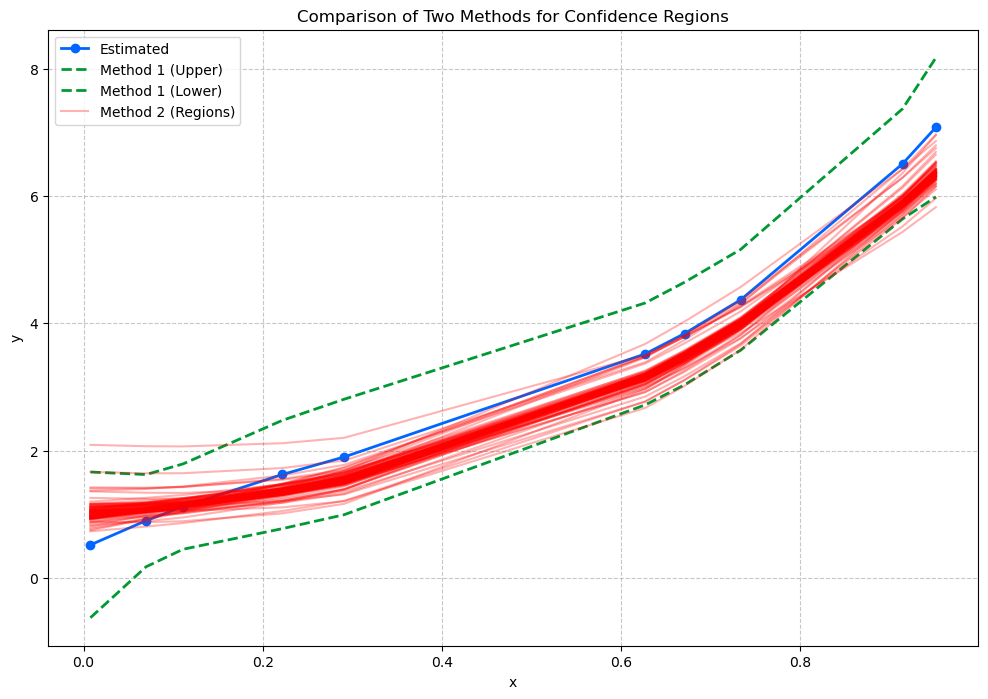

In [7]:
plt.figure(figsize=(12, 8))

# Plot the estimated line
plt.plot(x, y_estimated, 'o-', color='#0066ff', label='Estimated', linewidth=2)

# Method 1: Plot upper and lower bounds (1.96 * width)
plt.plot(x, width_upper, '--', color='#009933', label='Method 1 (Upper)', linewidth=2)
plt.plot(x, width_lower, '--', color='#009933', label='Method 1 (Lower)', linewidth=2)

# Method 2: Plot the regions
for i in range(num):
    if i == 0:
        plt.plot(x, region_arr[i], '-', color='red', alpha=0.3, label='Method 2 (Regions)')
    else:
        plt.plot(x, region_arr[i], '-', color='red', alpha=0.3)

# Customisation du plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Two Methods for Confidence Regions')
plt.legend()

# Display the plot
plt.show()